In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('/Users/garvit/Desktop/NestWise/Clean Data/gurgaon_properties_cleaned_v2.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory3.,sector 70,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet a...,4.0,5.0,3+,6.0,East,Moderately Old,2400.0,NaN,1850.0,0,1,0,0,0,1,95
1,flat,capital residences 360,sector 70a,1.69,8552.0,1976.0,Super Built up area 1976(183.58 sq.m.)Built Up...,3.0,3.0,3+,8.0,North-East,New Property,1976.0,1900.0,1650.0,0,1,0,0,0,0,165
2,flat,emaar palm premier,sector 77,2.10,10500.0,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,4.0,3+,11.0,NaN,New Property,2000.0,1600.0,1500.0,0,1,0,0,0,1,129
3,flat,m3m merlin3.,sector 67,2.65,12945.0,2047.0,Super Built up area 2047(190.17 sq.m.)Built Up...,3.0,3.0,3,0.0,North-East,Relatively New,2047.0,1900.0,1700.0,0,0,0,0,1,1,174
4,flat,dnha group housing society,manesar,0.75,4518.0,1660.0,Super Built up area 1660(154.22 sq.m.),3.0,2.0,2,5.0,NaN,Moderately Old,1660.0,NaN,NaN,0,0,0,0,0,0,0


In [8]:
df.shape

(3817, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3816 non-null   object 
 1   society              3815 non-null   object 
 2   sector               3817 non-null   object 
 3   price                3787 non-null   float64
 4   price_per_sqft       3787 non-null   float64
 5   area                 3787 non-null   float64
 6   areaWithType         3816 non-null   object 
 7   bedRoom              3816 non-null   float64
 8   bathroom             3816 non-null   float64
 9   balcony              3816 non-null   object 
 10  floorNum             3797 non-null   float64
 11  facing               2704 non-null   object 
 12  agePossession        3817 non-null   object 
 13  super_built_up_area  1918 non-null   float64
 14  built_up_area        1737 non-null   float64
 15  carpet_area          1951 non-null   f

In [10]:
df.duplicated().sum()

np.int64(126)

In [11]:
df.drop_duplicates(inplace=True)

1. Property Type (property_type)

-> Since it's a categorical col, whenever we have a catergorical col, we try to understand the distribution of the category -- how ? by plotting.

<Axes: xlabel='property_type'>

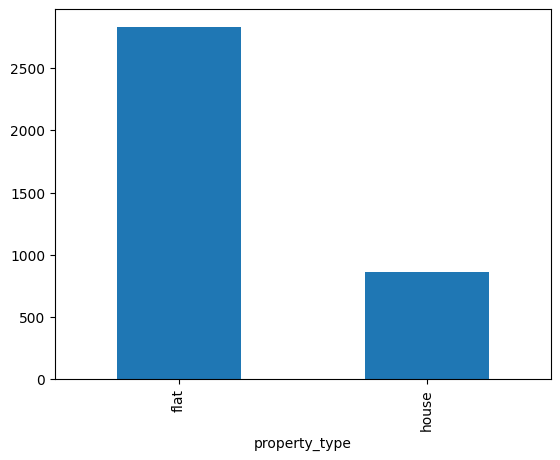

In [ ]:
df['property_type'].value_counts().plot(kind='bar')

Observations :

- Flats are in majority around 75 %
- No missing values

2. Society (society)

-> Categorical col, find distribution 

In [ ]:
df['society'].value_counts().shape # too many category in society

(724,)

In [ ]:
df['society'].value_counts() # there are 486 independent houses

society
independent                               486
tulip violet4.                             73
ss the leaf3.                              72
shapoorji pallonji joyville gurugram4.     38
shree vardhman victoria3.                  34
                                         ... 
sobha smriti apartments                     1
unitech the palms                           1
shreeram apartment ii                       1
experion heartsong                          1
ansal maple heights3.                       1
Name: count, Length: 724, dtype: int64

In [18]:
df[df['society'] != 'independen']['society'].value_counts(normalize=True).cumsum().head(75)

society
independent                               0.131743
tulip violet4.                            0.151532
ss the leaf3.                             0.171049
shapoorji pallonji joyville gurugram4.    0.181350
shree vardhman victoria3.                 0.190567
                                            ...   
ramsons kshitij3.                         0.540526
ireo the corridors                        0.543779
unitech uniworld resorts                  0.547032
mvn athens3.                              0.550285
central park flower valley                0.553538
Name: proportion, Length: 75, dtype: float64

In [19]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
freq_bin = {
    "Very High ( > 100)":(society_counts > 100).sum(),
    "High ( > 50 )":((society_counts >= 50 ) & (society_counts <= 100)).sum(),
    "Average (10 - 49)":((society_counts >= 10 ) & (society_counts < 50)).sum(),
    "Low (2-9)":((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)":(society_counts == 1).sum()
}

freq_bin

{'Very High ( > 100)': np.int64(1),
 'High ( > 50 )': np.int64(2),
 'Average (10 - 49)': np.int64(92),
 'Low (2-9)': np.int64(291),
 'Very Low (1)': np.int64(338)}

<Axes: xlabel='society'>

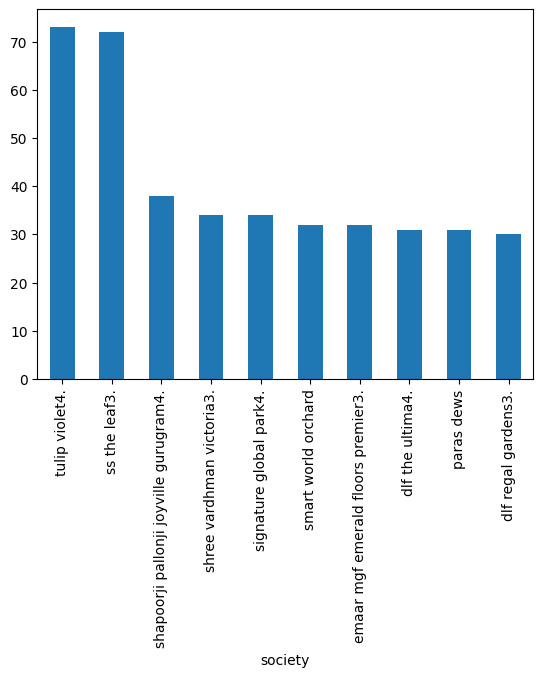

In [20]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

Observation :

- Around 13% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies

    Very High (>100): Only 1 society has more than 100 listings.
    High (50-100): 2 societies have between 50 to 100 listings.
    Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    Low (2-9): 273 societies have between 2 to 9 listings.
    Very Low (1): A significant number, 308 societies, have only 1 listing.

-1 missing value